# Trabajo Práctico $N^{\circ}8$: Muestreo y análisis de Fourier en tiempo discreto

Ejecutar primero la siguiente celda que importa las libríeras necesarias

In [67]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as ipwidgets
import os
from matplotlib.animation import FuncAnimation
import matplotlib as matplotlib
from matplotlib import rc
from scipy import signal
import IPython.display as ipd
import matplotlib.ticker as ticker
from numpy.fft import fft, ifft, fftfreq
rc('animation', html='jshtml')
%matplotlib inline
# SE DEBE EJECUTAR MANUALMENTE EN LA CONSOLA (FIX)
# jupyter nbextension enable --py --sys-prefix widgetsnbextension

# Muestreo

Dado los beneficios prácticos en términos de almacenamiento y reproducibilidad entre otros, el tratamiento eléctrico de la información se realiza en muchos casos de manera __digital__, o sea, trabajando con señales __cuantificadas de tiempo discreto__. Esto introduce un paso básico y muy común en el procesamiento de señales, a saber, la conversión analógico-digital (ADC) y su inverso, la conversión digital-analógica (DAC). Un esquema básico donde pueden verse implementados tanto la transducción como las ADC y DAC en un sistema real, se muestra en la figura de abajo.

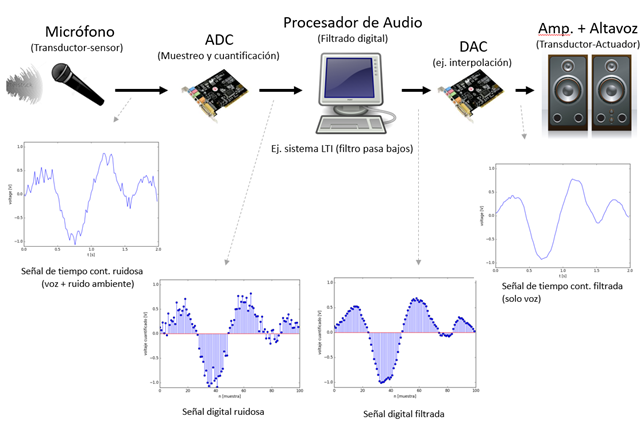

<u>Ejercicio Python 1: Muestreo de una señal periódica</u>

En el siguiente programa se grafica una señal periódica, a saber un tono puro de frecuencia $w$, así como su versión muestreada. 

- Elegir un intervalo de muestreo (detla_t) de 1/25. Que diferencia nota entre los periodos de $x(t)$ y $x[n]$ ?
- Elegir detla_t para que la señal discreta resultante sea también periódica.
- A que frecuencia lineal de muestreo corresponde el delta_t del punto anterior? Es suficiente para muestrear correctamente la señal? 
- Cual es la minima frecuencia de muestreo correcta ?  Introducir ese valor y graficar.

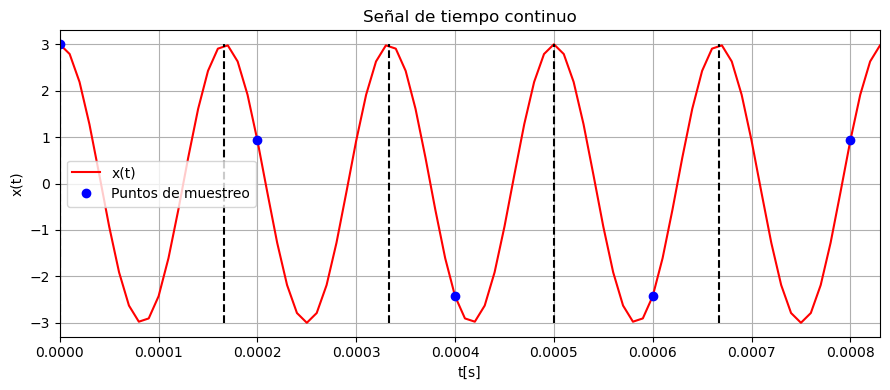

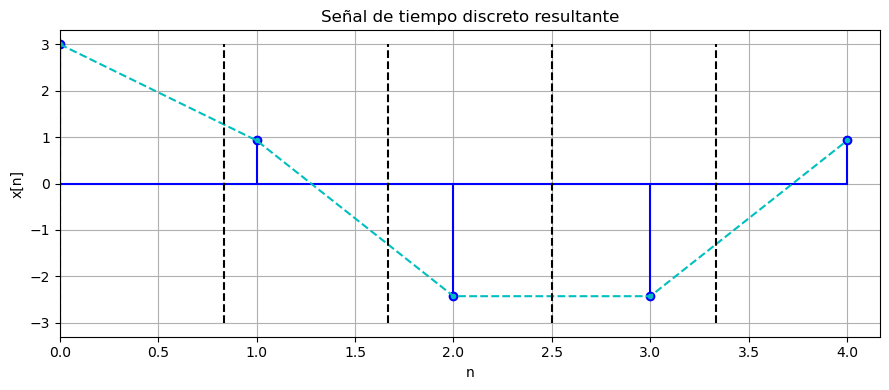

In [152]:
w=2*np.pi*6e3 # frecuencia angular de x(t) [rad/s]
A=3 # Amplitud de x(t) , e.g., [V]
n_per = 5 # no. de periodos a graficar

###COMPLETAR
delta_t = 1/5e3 #1/25e3 #10/3*2*np.pi/w #[s]
###COMPLETAR

# Preiodo [s]
T=2*np.pi/w 

# vectores de tiempo
t = np.arange(0,n_per*T,1e-5) # vector de tiempo
n =  np.arange(0,n_per*T,delta_t)

# Definicion de funciones
x_de_t = A*np.cos(w*t)
x_de_n = A*np.cos(w*n)

#gráfico x(t)
plt.figure(figsize=(9, 4))
plt.plot(t,x_de_t,'r', label='x(t)')
plt.plot(n, x_de_n,'ob',label='Puntos de muestreo')
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.xlim([0,np.max(t)])
plt.grid(which='both')
plt.title('Señal de tiempo continuo')
for i in range(n_per):
    plt.plot([T*i,T*i],[-A,A], '--k')
plt.legend()
plt.tight_layout()
plt.show()

#gráfico x[n]
plt.figure(figsize=(9, 4))
plt.stem(n/delta_t, x_de_n,linefmt='b', basefmt="b")
plt.plot(n/delta_t, x_de_n,'.--c')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.xlim([0,n_per*T/delta_t])
for i in range(n_per):
    plt.plot([T*i/delta_t,T*i/delta_t],[-A,A], '--k')
plt.grid(which='both')
plt.title('Señal de tiempo discreto resultante')
plt.tight_layout()          
plt.show()

<u>Ejercicio Python 2: Muestreo de señal compuesta</u>

El siguiente código muestra gráficamente y mediante sonido una señal compuesta de tiempo continuo, $x(t) =\sum_{n=0}^4 {a_n\,cos(w_0\,n\,t)}$, su versión muestreada,$x[n]$, y la señal recuperada, $x_r(t)$, mediante una interpolacion de Fourier sobre $x[n]$ (una versión mas sofisticada que un zero-order-holder). 

- Es $x(t)$ periódica, por que?
- Cuantas componentes armónicas tiene la señal y cuales son la frecuencia fundamental y máxima ($f_{max}$)? Es de banda limitada ?
- Hallar la frecuencia lineal de muestreo mínima posible, $f_s$.
- Definir el intervalo de muestreo, delta_t, correspondiente a $1.6f_{max}$ y ejecutar el código. Nota alguna differencia visual o sonora entre $x(t)$ y $x_r(t)$, cual ? Hallar la frecuencia de alias para este caso.
- Definir el intervalo de muestreo, delta_t, correspondiente a $2.5f_{max}$ y ejecutar el código. Nota alguna differencia visual o sonora entre $x(t)$ y $x_r(t)$, cual ?


Coeficientes de Fourier: [1.  0.9 0.8 0.7 0.6]
Frecuencias [kHz]: ['0.0', '5.0', '10.0', '15.0', '20.0']


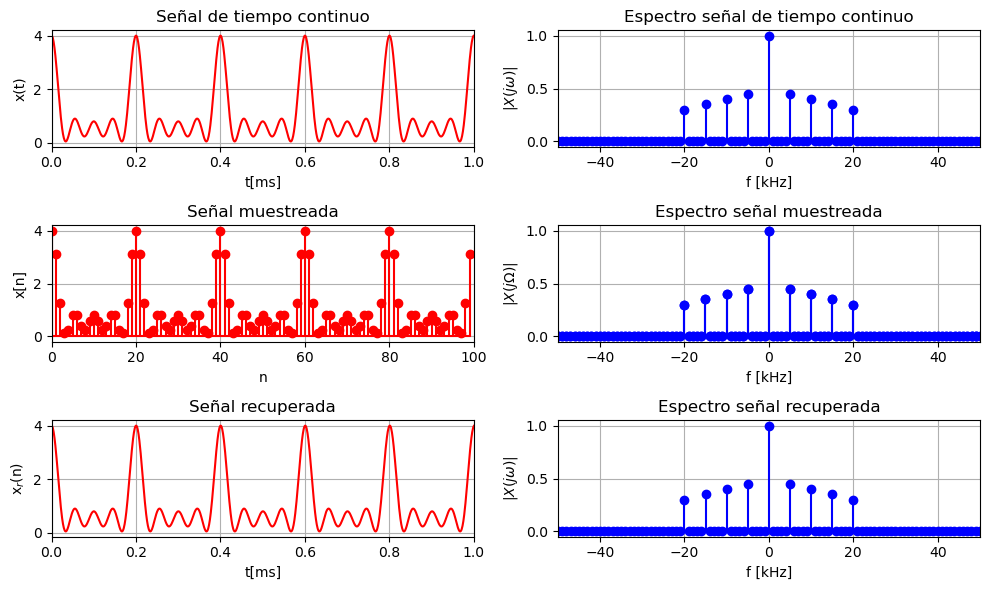

In [151]:
w=2*np.pi*5e3 # frecuencia angular fundamental [rad/s] 
n_per = 5 # no. de periodos a graficar
a=np.linspace(1,0.6,num=5) # coef de Fourier
print('Coeficientes de Fourier:',a)

###COMPLETAR
delta_t = 1./(5*20e3)  # 1./(1.6*20e3) #1./(2.5*6*8e3) # Intervalo de muestreo [s]
###COMPLETAR

# Preiodo [s]
T=2*np.pi/w 

# vectores de tiempo
t =  np.arange(0,n_per*T,1/1e6) # vector de tiempo continuo 1 us
n =  np.arange(0,n_per*T,delta_t)

# Definicion de la señal
x_de_t = np.sum([a[i]*np.cos(i*w*t) for i in range(len(a))], axis=0) #A*np.cos(w*t)+0.3*A*np.cos(6*w*t)
x_de_n = np.sum([a[i]*np.cos(i*w*n) for i in range(len(a))], axis=0) #A*np.cos(w*n)+0.3*A*np.cos(6*w*n)
x_de_t_rec = signal.resample(x_de_n, len(t))
print('Frecuencias [kHz]:',['{:3.1f}'.format(i*w/1000/(2*np.pi)) for i in range(len(a))])

#gráfico x(t)
fig, axs = plt.subplots(3, 2, figsize=(10, 6))
axs[0,0].plot(t*1000,x_de_t,'r', label='x(t)')
axs[0,0].set_xlabel('t[ms]')
axs[0,0].set_ylabel('x(t)')
axs[0,0].set_xlim([0,n_per*T*1000])
axs[0,0].grid(which='both')
axs[0,0].set_title('Señal de tiempo continuo')

#gráfico FFT(x(t))
l=len(x_de_t)
x_de_t_fft = abs(fft(x_de_t)/l)
f = np.fft.fftfreq(len(x_de_t), d=1/1e6)
axs[0,1].stem(f/1000, x_de_t_fft,linefmt='b', basefmt="b")
axs[0,1].set_xlabel('f [kHz]')
axs[0,1].set_ylabel('$|X(j\omega)|$')
axs[0,1].set_xlim([-10*w/2/np.pi/1000,10*w/2/np.pi/1000])
axs[0,1].grid(which='both')
axs[0,1].set_title('Espectro señal de tiempo continuo')

#gráfico x[n]
axs[1,0].stem(n/delta_t, x_de_n,linefmt='r', basefmt="r")
axs[1,0].set_xlabel('n')
axs[1,0].set_ylabel('x[n]')
axs[1,0].set_xlim([0,n_per*T/delta_t])
axs[1,0].grid(which='both')
axs[1,0].set_title('Señal muestreada')

#gráfico FFT(x[n])
l=len(x_de_n)
x_de_n_fft = abs(fft(x_de_n)/l)
f = np.fft.fftfreq(len(x_de_n_fft), d=delta_t)
axs[1,1].stem(f/1000, x_de_n_fft,linefmt='b', basefmt="b")
axs[1,1].stem((f+2*f.min())/1000, x_de_n_fft,linefmt='b', basefmt="b")
axs[1,1].stem((f+2*f.max())/1000, x_de_n_fft,linefmt='b', basefmt="b")
axs[1,1].stem(f/1000, x_de_n_fft,linefmt='b', basefmt="b")
axs[1,1].set_xlabel('f [kHz]')
axs[1,1].set_ylabel('$|X(j\Omega)|$')
axs[1,1].set_xlim([-10*w/2/np.pi/1000,10*w/2/np.pi/1000])
axs[1,1].grid(which='both')
axs[1,1].set_title('Espectro señal muestreada')

#gráfico x_r(t)
axs[2,0].plot(t*1000, x_de_t_rec,'r')
axs[2,0].set_xlabel('t[ms]')
axs[2,0].set_ylabel('x$_{r}$(n)')
axs[2,0].grid(which='both')
axs[2,0].set_xlim([0,n_per*T*1000])
axs[2,0].set_title('Señal recuperada')

#gráfico FFT(x_r(t))
l=len(x_de_t_rec)
x_de_t_rec_fft = abs(fft(x_de_t_rec)/l)
f = np.fft.fftfreq(len(x_de_t_rec), d=1/1e6)
axs[2,1].stem(f/1000, x_de_t_rec_fft,linefmt='b', basefmt="b")
axs[2,1].set_xlabel('f [kHz]')
axs[2,1].set_ylabel('$|X(j\omega)|$')
axs[2,1].set_xlim([-10*w/2/np.pi/1000,10*w/2/np.pi/1000])
axs[2,1].grid(which='both')
axs[2,1].set_title('Espectro señal recuperada')

plt.tight_layout()
plt.show()

Ejecutar las siguientes dos celdas para reproducir la señales en forma de audio.

In [117]:
print('Señal de tiempo continuo, x(t)')
ipd.Audio(np.tile(x_de_t, 100), rate=30e3)

Señal de tiempo continuo, x(t)


In [118]:
print('Señal recuperada, x_r[n]')
ipd.Audio(np.tile(x_de_t_rec, 100), rate=30e3)

Señal recuperada, x_r[n]


<u>Ejercicio Python 3: AULA INVERTIDA</u>



Investigue para que sirve la función numpy.fft.fft() utilizada en el ejercicio Python 2.

# Serie Discreta de Fourier vs FFT

Hasta el momento hemos aprendido las herramientas para trabajar con señales de tiempo continuo. Ahora introducimos las herramientas análogas para el tiempo discreto, a saber la Serie de Fourier de Tiempo Discreto (SFTD) y la Transformada de Foruirer de Tiempo Discreto (TFTD): 

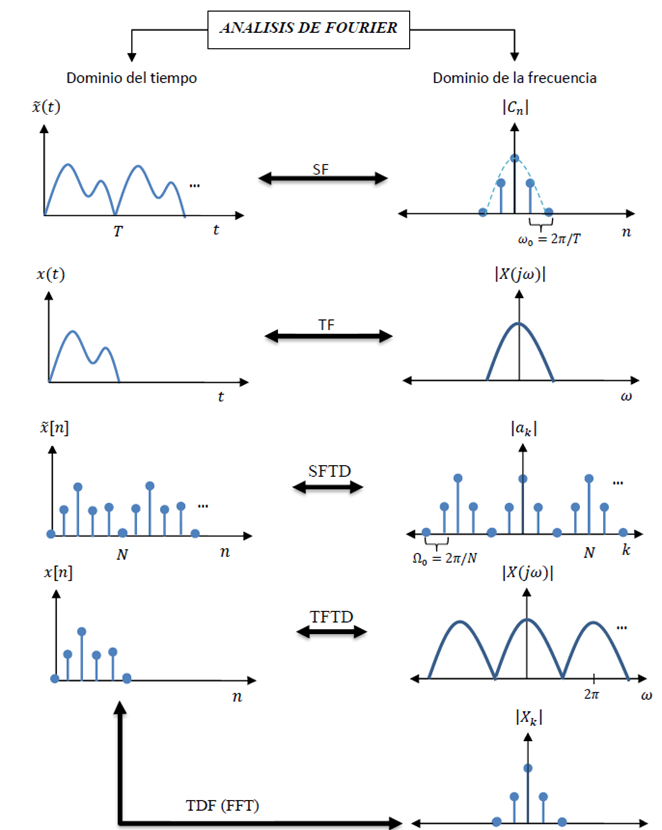

Como mencionamos arriba, gran mayoría del procesamiento de señales se realiza en la actualidad de manera digital, es decir, trabajando con señales cuantizadas de tiempo discreto, tanto en el dominio del tiempo como en el de la frecuencia. PDebido a esto, la Transformada Discreta de Fourier (TDF) es quizás la herramienta matemática más utilizada en ingeniería moderna. El cálculo de la TDF se realiza utilizando uno de los algoritmos más famosos de la historia, la Transformada Rápida de Fourier (FFT).

Ejercicio Python 4: TFTD vs FFT

El siguiente gráfico muestra la señal del Ej. 13.a de gabinete, así como los espectros de amplitud y fase resultantes al calcular su TFTD (ver Ec. 28 del práctico). 

- Es pdescribir exactamente la TFTD numéricamente ? Que estamos gráficando en realidad?
- Calcular la transformada (fft_x) utilizando la función fft(), e incluyendo el eje de frecuencias (freq). Inspirarse en el Ej. Python 2.
- Comparar los resultados de TFTD y FFT
- La cantidad de muestras en el espectro de salida de la FFT es igual a la cantidad de muestras de la señal. Por lo que puede incrementarse la resolución espectral haciendo un zero-padding. Incluya la linea x = np.pad(x,[0,20]) luego de la definicion de la señal y compare los gráficos con el caso sin padding.

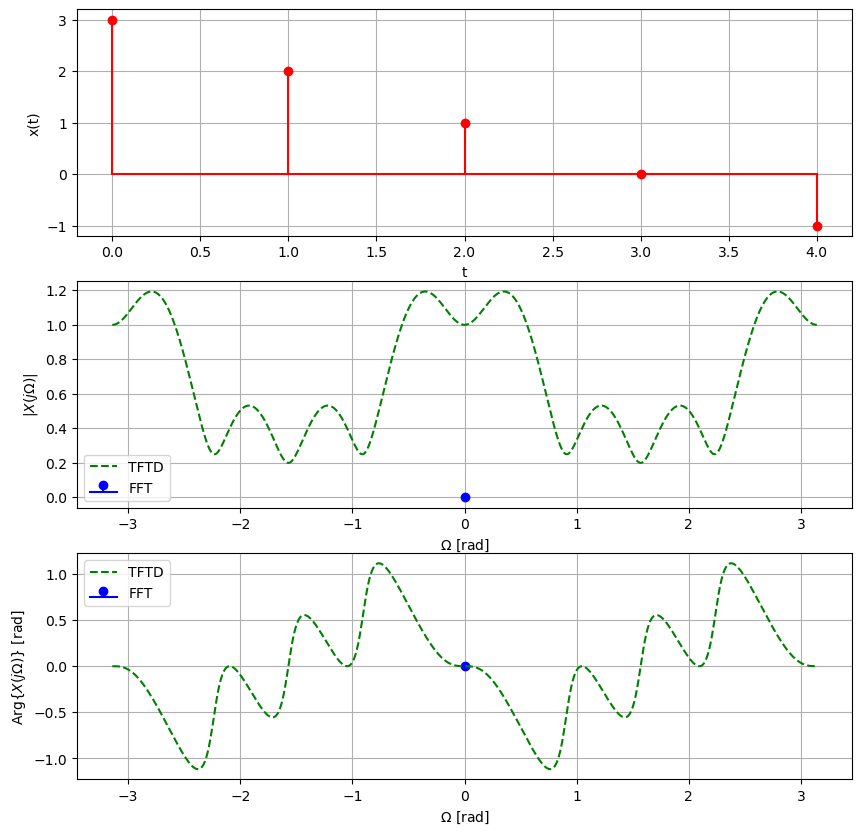

In [153]:
# definición de la señal
x = np.array([3, 2, 1, 0,-1])

### COMPLETAR
fft_x = 0
freq = 0
### COMPLETAR

# Analitical DFT
freqr = np.linspace(-1, 1,1000)*np.pi
fft_x_ana = 3 + 2*np.e**(-1j*2*freqr) + np.e**(-1j*2*2*freqr) - np.e**(-1j*4*2*freqr)

fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].stem(x,linefmt='r', basefmt="r")
ax[0].set_xlabel('t')
ax[0].set_ylabel('x(t)')
ax[0].grid()

ax[1].plot(freqr, np.abs(fft_x_ana)/len(x),'--g', label='TFTD')
ax[1].stem(freq, np.abs(fft_x), label='FFT',linefmt='b', basefmt="b")
ax[1].set_xlabel('$\Omega$ [rad]')
ax[1].set_ylabel('$|X(j\Omega)|$')
ax[1].legend()
ax[1].grid()

ax[2].stem(freq, np.angle(fft_x),linefmt='b', basefmt="b", label='FFT')
ax[2].plot(freqr, np.angle(fft_x_ana),'--g', label='TFTD')
ax[2].set_xlabel('$\Omega$ [rad]')
ax[2].set_ylabel('Arg{$X(j\Omega)$} [rad]')
ax[2].legend()
ax[2].grid()
plt.show()


Ejercicio Python 5: Espectro de señal ruidosa

El ruido es una señal, la gran mayoría de las veces indeseada, que está presente en prácticamente todos los sistemas y circuitos electrónicos. Entre los diferentes tipos de ruido, el llamado ruido blanco es el más básico y frecuente. 

En este ejercicio, se visualizará el efecto que tiene la adición del ruido blanco a una señal compuesta, tanto en el dominio del tiempo como en el de la frecuencia. }


- Incrementar la amplitud del ruido y observar los cambios en la señal ruidosa resultante y su espectro.
- Cuantas componentes tiene la señal original?
- Que forma tiene el espectro del ruido blanco y como se relaciona esto con su nombre?
- Puede filtrarse el ruido blanco de la señal ruidosa?

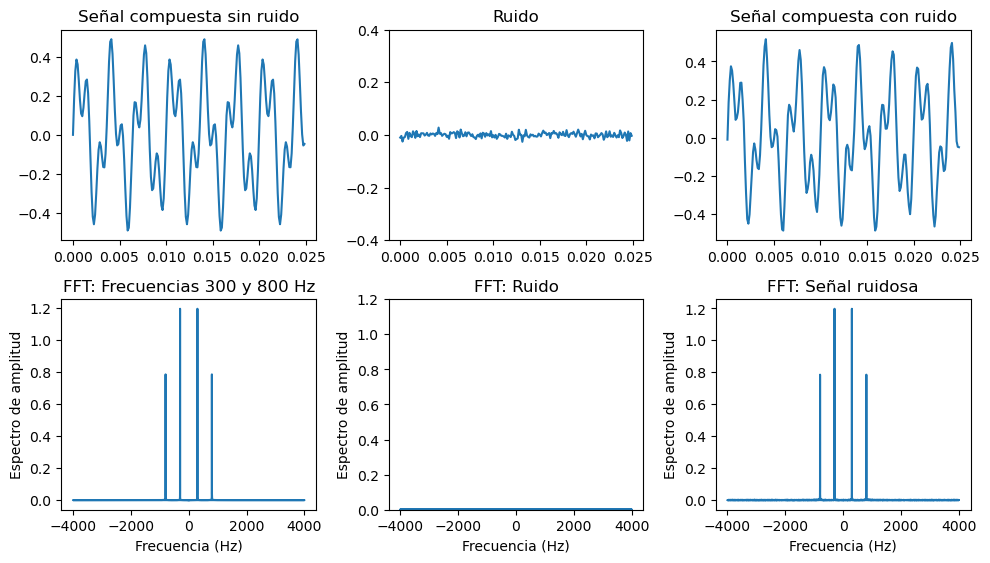

In [148]:
def crear_ruido(n_muestras, amplitud=0.025, semilla=None):
    if semilla:
        np.random.seed(semilla)
    ruido = amplitud * np.random.randn(n_muestras)
    return ruido

def crear_señal(frecuencia=200, amplitud=0.4, frecuencia_muestreo=8000, dur_sec=0.25):

    t = np.linspace(0, dur_sec,int(np.floor(dur_sec*frecuencia_muestreo)))
    señal = amplitud * np.sin((frecuencia*2*np.pi)*t)
    return señal, frecuencia_muestreo, t

num_samps = 200
frec1 = 300
frec2 = 800
###COMPLETAR
amp_ruido = 0.01
###COMPLETAR
señal1, fm, t = crear_señal(frecuencia=frec1,dur_sec=1, amplitud=0.3)
señal2, fm, t = crear_señal(frecuencia=frec2,dur_sec=1, amplitud=0.2)
señal_compuesta = señal1+señal2
ruido_señal = crear_ruido(len(señal_compuesta), amplitud=amp_ruido)
señal_compuesta_ruidosa = señal_compuesta + (ruido_señal)

fig = plt.figure(figsize=(10,8))
plt.subplot(3,3,1)
plt.plot(t[:num_samps],señal_compuesta[:num_samps])
plt.title('Señal compuesta sin ruido')
plt.subplot(3,3,2)
plt.plot(t[:num_samps],ruido_señal[:num_samps])
plt.title('Ruido')
plt.ylim([-0.4,0.4])
plt.subplot(3,3,3)
plt.plot(t[:num_samps],señal_compuesta_ruidosa[:num_samps])
plt.title('Señal compuesta con ruido')
plt.tight_layout()

x = fft(señal_compuesta)/l
f = np.fft.fftfreq(len(x), d=1/fm) 
plt.subplot(3,3,4)
plt.plot(f,abs(x))
#plt.yscale('log')
plt.title('FFT: Frecuencias {} y {} Hz'.format(frec1,frec2))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de amplitud')
plt.tight_layout()

x = fft(ruido_señal)/l
f = np.fft.fftfreq(len(x), d=1/fm) 
plt.subplot(3,3,5)
plt.plot(f,abs(x))
#plt.yscale('log')
plt.title('FFT: Ruido')
plt.ylim([0,1.2])
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de amplitud')
plt.tight_layout()

x = fft(señal_compuesta_ruidosa)/l
f = np.fft.fftfreq(len(x), d=1/fm) 
plt.subplot(3,3,6)
plt.plot(f,abs(x))
#plt.yscale('log')
plt.title('FFT: Señal ruidosa')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Espectro de amplitud')
plt.tight_layout()


Ejercicio Python 6: AULA INVERTIDA

Compare la solución del Ej. 13.b de gabinete con la FFT de la misma señal. Inspirarse en el ejercicio Python 4.


In [ ]:
TBD